<a href="https://colab.research.google.com/github/sujitojha1/EVA4/blob/rev1/S9/EVA4_S9_Solution_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement EVA 4, Session9 : CIFAR 10

**Target**: 


*   Extract the ResNet18 model from this repository and add it to your API/repo.
*   Use your data loader, model loading, train, and test code to train ResNet18 on Cifar10
*   Target is 85% accuracy. No limit on the number of epochs. Use default ResNet18 code (so params are fixed). 

**Results**

*  Total Parameters = 
*  After 10 Epochs, Final Train Accuracy = 
*  After 10 Epochs, Final Test Accuracy =

**Analysis**

*  Target accuracy > 85% using Reset18 architecture. Model performance is good as train and test accuracy is small.

## 1. Loading Module and Models 

In [0]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!rm -rf EVA4
!git clone -b rev1 https://github.com/sujitojha1/EVA4 -q --quiet
print("Loaded EVA4 Modules and Models")

# For inline matplotlib plotting
%matplotlib inline

Loaded EVA4 Modules and Models



## 2. Loading train and test data with transforms and loader functions

In [0]:
from EVA4.Modules import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(sample_batch_size=5, batch_size=128)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)
sample_trainloader = cifar10.sample_loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

CUDA availability ? True
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


## 3. Exploratory Data Analysis

### 3.1 Summary Statistics

In [0]:
cifar10.data_summary_stats()
#print(vars(train))

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


### 3.2 Plotting sample images

Files already downloaded and verified


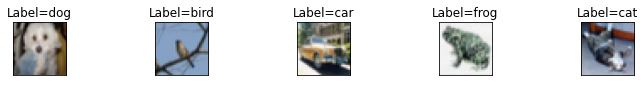

In [0]:
cifar10.sample_pictures(train_flag=True)

# The Model

In [0]:
from EVA4.Models import *

# Loading ResNet18 Model
net = ResNet18()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


# Model Summary

In [0]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

# Define a Loss function and optimizer

In [0]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Training and Testing

In [0]:
# Load train and test model
from EVA4.Modules import *

train = train()
test = test()

for epoch in range(5):  # loop over the dataset multiple times

    train.execute(net, device, trainloader, optimizer, criterion, epoch)
    test.execute(net, device, testloader, criterion)

print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 0


Loss=1.0565814971923828 Batch_id=390 Accuracy=41.78: 100%|██████████| 391/391 [00:32<00:00, 13.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0094, Accuracy: 5797/10000 (57.97%)


Epoch: 1


Loss=0.8600016832351685 Batch_id=390 Accuracy=64.15: 100%|██████████| 391/391 [00:32<00:00, 14.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 6167/10000 (61.67%)


Epoch: 2


Loss=0.8117052316665649 Batch_id=390 Accuracy=72.68: 100%|██████████| 391/391 [00:32<00:00, 14.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 7139/10000 (71.39%)


Epoch: 3


Loss=0.5228620767593384 Batch_id=390 Accuracy=76.74: 100%|██████████| 391/391 [00:32<00:00, 14.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7491/10000 (74.91%)


Epoch: 4


Loss=0.5900965929031372 Batch_id=390 Accuracy=79.50: 100%|██████████| 391/391 [00:32<00:00, 12.17it/s]



Test set: Average loss: 0.0051, Accuracy: 7828/10000 (78.28%)

Finished Training


# display an image from the test set

Files already downloaded and verified


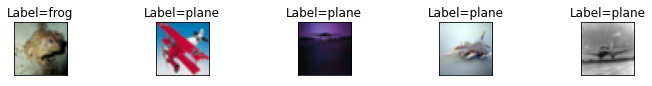

In [0]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

# Prediction of sampe test set

In [0]:
images,labels = images.to(device),labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

Predicted:   frog plane plane plane plane


# Plotting Train & Test Accuracy/Losses

Text(0.5, 1.0, 'Test Accuracy')

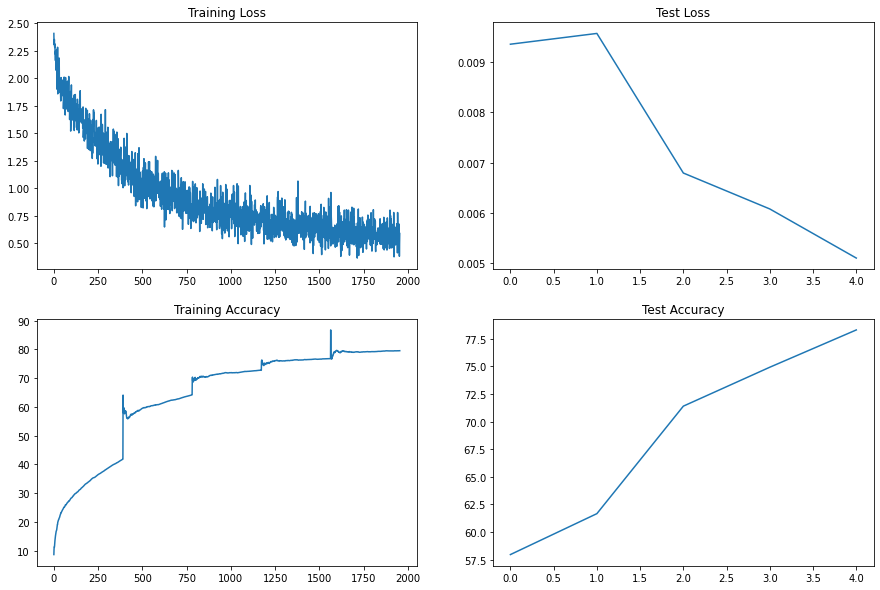

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test.test_acc)
axs[1, 1].set_title("Test Accuracy")

# Evaluating test Accuracy over different classes 

In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels = images.to(device),labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 57 %
Accuracy of   car : 88 %
Accuracy of  bird : 76 %
Accuracy of   cat : 43 %
Accuracy of  deer : 77 %
Accuracy of   dog : 85 %
Accuracy of  frog : 82 %
Accuracy of horse : 86 %
Accuracy of  ship : 77 %
Accuracy of truck : 97 %


Files already downloaded and verified


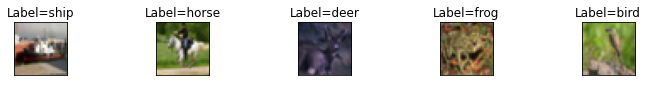

In [0]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

In [0]:
# initialize a model, model_dict and gradcam
resnet = net
resnet.eval()
gradcam = GradCAM.from_config(model_type='resnet', arch=resnet, layer_name='layer4')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


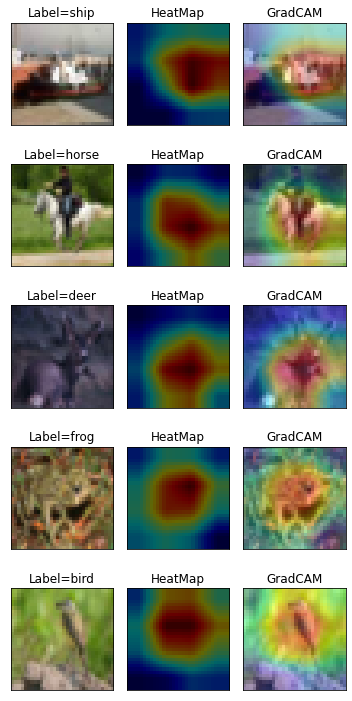

In [0]:
fig = plt.figure(figsize=(5, 10))
idx_cnt=1
for idx in np.arange(len(labels.numpy())):

  img = images[idx]
  lbl = labels.numpy()[idx]

  # get an image and normalize with mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
  img = img.unsqueeze(0).to(device)
  normed_img = normalize(img,mean=(0.4914, 0.4822, 0.4465),std=(0.2023, 0.1994, 0.2010))

  # get a GradCAM saliency map on the class index 10.
  mask, logit = gradcam(normed_img, class_idx=lbl)
  # make heatmap from mask and synthesize saliency map using heatmap and img
  heatmap, cam_result = visualize_cam(mask, img, alpha=0.4)

  # Show images
  # for idx in np.arange(len(labels.numpy())):
  # Original picture
  ax = fig.add_subplot(5, 3, idx_cnt, xticks=[], yticks=[])
  npimg = np.transpose(img[0].cpu().numpy(),(1,2,0))
  ax.imshow(npimg, cmap='gray')
  ax.set_title("Label={}".format(str(classes[lbl])))
  idx_cnt+=1

  ax = fig.add_subplot(5, 3, idx_cnt, xticks=[], yticks=[])
  npimg = np.transpose(heatmap,(1,2,0))
  ax.imshow(npimg, cmap='gray')
  ax.set_title("HeatMap".format(str(classes[lbl])))
  idx_cnt+=1

  ax = fig.add_subplot(5, 3, idx_cnt, xticks=[], yticks=[])
  npimg = np.transpose(cam_result,(1,2,0))
  ax.imshow(npimg, cmap='gray')
  ax.set_title("GradCAM".format(str(classes[lbl])))
  idx_cnt+=1

fig.tight_layout()  
plt.show()